# Mass Mobilization Dataset Preview


In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import datetime as dt
%config IPCompleter.greedy=True

In [2]:
print(os.getcwd())

/Users/Montealvo/Springboard/Capstone_Two/Mass_Mobilization


In [3]:
mm_data = pd.read_csv('../Mass_Mobilization/raw_data/raw_downloads/mmALL_073119_csv.tab', delimiter= '\t')

In [4]:
mm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [5]:
mm_data.shape

(16363, 31)

In [6]:
mm_data.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [7]:
mm_data.describe()

,id,ccode,year,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence
count,1.636300e+04,16363.000000,16363.000000,16363.000000,16363.000000,14514.000000,14514.000000,14514.000000,14514.000000,14514.000000,14514.000000,15033.000000
mean,4.366134e+09,436.412883,2005.544093,0.887001,7.169651,15.450324,6.162464,2005.684649,15.575720,6.179964,2005.687405,0.253842
std,2.324265e+09,232.426438,8.718902,0.316601,11.635211,8.830148,3.454530,8.696184,8.815945,3.454780,8.697528,0.435222
min,2.019900e+08,20.000000,1990.000000,0.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,1990.000000,0.000000
25%,2.202004e+09,220.000000,1998.000000,1.000000,1.000000,8.000000,3.000000,1998.000000,8.000000,3.000000,1998.000000,0.000000
50%,4.331993e+09,433.000000,2006.000000,1.000000,3.000000,15.000000,6.000000,2007.000000,16.000000,6.000000,2007.000000,0.000000
75%,6.452019e+09,645.000000,2014.000000,1.000000,8.000000,23.000000,9.000000,2014.000000,23.000000,9.000000,2014.000000,1.000000
max,9.102019e+09,910.000000,2019.000000,1.000000,143.000000,31.000000,12.000000,2019.000000,31.000000,12.000000,2019.000000,1.000000


In [8]:
#prof = ProfileReport(mm_data)
#prof.to_widgets()
#prof.to_file(output_file='output.html')

## Looking at participant and participant_category data

In [9]:
participants_int = pd.read_csv('../Mass_Mobilization/raw_data/mm_participants_id_updated.csv', index_col='id')

In [10]:
mm_data = pd.merge(mm_data, participants_int, on=['id'])

In [11]:
pc_ranges= [0,50,99,999,1999,4999,10000,np.inf]
pc_names=['0-50','50-99','100-999','1000-1999','2000-4999','5000-10000','>10000']
mm_data['new_participants_category']= pd.cut(mm_data['participants_int'], bins=pc_ranges, labels = pc_names)
mm_data[['new_participants_category', 'participants_int']]

,new_participants_category,participants_int
0,1000-1999,1500.0
1,1000-1999,1000.0
2,100-999,500.0
3,100-999,550.0
4,100-999,950.0
...,...,...
16358,50-99,75.0
16359,50-99,75.0
16360,100-999,100.0
16361,NaN,NaN


## Looking at protester demands

In [12]:
demands = mm_data[['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']]

In [13]:
demands.head()

,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4
0,"political behavior, process",labor wage dispute,NaN,NaN
1,"political behavior, process",NaN,NaN,NaN
2,"political behavior, process",NaN,NaN,NaN
3,land farm issue,NaN,NaN,NaN
4,"political behavior, process",NaN,NaN,NaN


In [14]:
demands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16363 entries, 0 to 16362
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   protesterdemand1  14503 non-null  object
 1   protesterdemand2  2676 non-null   object
 2   protesterdemand3  316 non-null    object
 3   protesterdemand4  896 non-null    object
dtypes: object(4)
memory usage: 639.2+ KB


## Combining protester demands into 1 column

In [15]:
#Note: Protester demands are uniform across columns
mm_data['demand_combo'] = demands.stack().groupby(level=0).apply('; '.join)

In [16]:
mm_data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,participants_int,new_participants_category,demand_combo
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...,1500.0,1000-1999,"political behavior, process; labor wage dispute"
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...,1000.0,1000-1999,"political behavior, process"
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema...",500.0,100-999,"political behavior, process"
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...,550.0,100-999,land farm issue
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...,950.0,100-999,"political behavior, process"


In [17]:
type(mm_data['demand_combo'])

pandas.core.series.Series

In [18]:
type(mm_data.loc[0,'demand_combo'])

str

## Making new columns for each demand 0/1

In [19]:
mm_data['labor_wage_dispute'] = mm_data.demand_combo.str.contains('labor wage dispute').astype('category')


In [20]:
mm_data['land_farm_issue'] = mm_data.demand_combo.str.contains('land farm issue').astype('category')

In [21]:
mm_data['police_brutality'] = mm_data.demand_combo.str.contains('police brutality').astype('category')

In [22]:
mm_data['political_behavior'] = mm_data.demand_combo.str.contains('political behavior, process').astype('category')

In [23]:
mm_data['price_increases_tax_policy'] = mm_data.demand_combo.str.contains('price increases, tax policy').astype('category')

In [24]:
mm_data['removal_of_politician'] = mm_data.demand_combo.str.contains('removal of politician').astype('category')

In [25]:
mm_data['social_restrictions'] = mm_data.demand_combo.str.contains('social restrictions').astype('category')

In [26]:
mm_data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,participants_int,new_participants_category,demand_combo,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior,price_increases_tax_policy,removal_of_politician,social_restrictions
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,1500.0,1000-1999,"political behavior, process; labor wage dispute",True,False,False,True,False,False,False
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,1000.0,1000-1999,"political behavior, process",False,False,False,True,False,False,False
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,500.0,100-999,"political behavior, process",False,False,False,True,False,False,False
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,550.0,100-999,land farm issue,False,True,False,False,False,False,False
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,950.0,100-999,"political behavior, process",False,False,False,True,False,False,False


## Looking at state response

In [27]:
responses = mm_data[['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']]

In [28]:
responses.head()

,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7
0,ignore,NaN,NaN,NaN,NaN,NaN,NaN
1,ignore,NaN,NaN,NaN,NaN,NaN,NaN
2,ignore,NaN,NaN,NaN,NaN,NaN,NaN
3,accomodation,NaN,NaN,NaN,NaN,NaN,NaN
4,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN


## Combining state responses into 1 column

In [29]:
#Note: State responses are uniform across columns
mm_data['response_combo'] = responses.stack().groupby(level=0).apply(', '.join)

In [30]:
mm_data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,new_participants_category,demand_combo,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior,price_increases_tax_policy,removal_of_politician,social_restrictions,response_combo
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,1000-1999,"political behavior, process; labor wage dispute",True,False,False,True,False,False,False,ignore
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,1000-1999,"political behavior, process",False,False,False,True,False,False,False,ignore
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,100-999,"political behavior, process",False,False,False,True,False,False,False,ignore
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,100-999,land farm issue,False,True,False,False,False,False,False,accomodation
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,100-999,"political behavior, process",False,False,False,True,False,False,False,"crowd dispersal, arrests, accomodation"


In [31]:
type(mm_data['response_combo'])

pandas.core.series.Series

In [32]:
type(mm_data.loc[0,'response_combo'])

str

## State First and Last response

In [33]:
state_response = mm_data['response_combo']

In [34]:
state_response.head()

0                                    ignore
1                                    ignore
2                                    ignore
3                              accomodation
4    crowd dispersal, arrests, accomodation
Name: response_combo, dtype: object

In [35]:
state_response.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16353, 16354, 16355, 16356, 16357, 16358, 16359, 16360, 16361,
            16362],
           dtype='int64', length=16363)

In [36]:
mm_data['first_response']= mm_data['response_combo'].str.split().str[0]

In [37]:
mm_data['first_response'].value_counts()

ignore           6873
crowd            3613
ignore,          1061
accomodation      744
arrests,          527
arrests           522
shootings,        300
accomodation,     193
.                 193
beatings,         177
killings,         129
beatings          124
shootings         115
killings          107
Name: first_response, dtype: int64

In [38]:
mm_data['last_response']= mm_data['response_combo'].str.split().str[-1]

In [39]:
mm_data['last_response'].value_counts()

ignore          6904
dispersal       2562
.               1787
arrests         1222
accomodation    1198
killings         391
beatings         353
shootings        261
Name: last_response, dtype: int64

## Making new columns for each response 0/1

In [40]:
mm_data['accomodation'] = mm_data.response_combo.str.contains('accomodation').astype('category')

In [41]:
mm_data['arrests'] = mm_data.response_combo.str.contains('arrests').astype('category')

In [42]:
mm_data['beatings'] = mm_data.response_combo.str.contains('beatings').astype('category')

In [43]:
mm_data['crowd_dispersal'] = mm_data.response_combo.str.contains('crowd dispersal').astype('category')

In [44]:
mm_data['ignore'] = mm_data.response_combo.str.contains('ignore').astype('category')

In [45]:
mm_data['killings'] = mm_data.response_combo.str.contains('killings').astype('category')

In [46]:
mm_data['shootings'] = mm_data.response_combo.str.contains('shootings').astype('category')

In [47]:
mm_data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,response_combo,first_response,last_response,accomodation,arrests,beatings,crowd_dispersal,ignore,killings,shootings
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,ignore,ignore,ignore,False,False,False,False,True,False,False
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,ignore,ignore,ignore,False,False,False,False,True,False,False
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,ignore,ignore,ignore,False,False,False,False,True,False,False
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,accomodation,accomodation,accomodation,True,False,False,False,False,False,False
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,"crowd dispersal, arrests, accomodation",crowd,accomodation,True,True,False,True,False,False,False


## Counting demands and responses

In [48]:
new_demands = mm_data[['labor_wage_dispute','land_farm_issue','police_brutality','political_behavior','price_increases_tax_policy','removal_of_politician','social_restrictions']]

In [49]:
mm_data['demands_count'] = new_demands.sum(axis=1).astype('int')

In [50]:
new_responses = mm_data[['accomodation','arrests','beatings','crowd_dispersal','ignore', 'killings','shootings']]

In [51]:
mm_data['responses_count'] = new_responses.sum(axis=1).astype('int')

In [52]:
mm_data.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,last_response,accomodation,arrests,beatings,crowd_dispersal,ignore,killings,shootings,demands_count,responses_count
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,ignore,False,False,False,False,True,False,False,2,1
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,ignore,False,False,False,False,True,False,False,1,1
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,ignore,False,False,False,False,True,False,False,1,1
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,accomodation,True,False,False,False,False,False,False,1,1
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,accomodation,True,True,False,True,False,False,False,1,3


In [53]:
mm_data[['id','participants','participants_category', 'participants_int','demands_count', 'responses_count' ]]

,id,participants,participants_category,participants_int,demands_count,responses_count
0,201990001,1000s,NaN,1500.0,2,1
1,201990002,1000,NaN,1000.0,1,1
2,201990003,500,NaN,500.0,1,1
3,201990004,100s,NaN,550.0,1,1
4,201990005,950,NaN,950.0,1,3
...,...,...,...,...,...,...
16358,9102017001,50+,50-99,75.0,2,1
16359,9102017002,50+,50-99,75.0,1,1
16360,9102017003,About 100,100-999,100.0,1,1
16361,9102018000,NaN,NaN,NaN,0,0


In [54]:
(mm_data['responses_count'] > 0).mean()

0.8852288700116115

In [55]:
## Setting Dates

In [56]:
mm_data['start_date'] = pd.to_datetime((mm_data.startyear*10000+mm_data.startmonth*100+mm_data.startday),format='%Y%m%d')

In [57]:
mm_data['end_date'] = pd.to_datetime((mm_data.endyear*10000+mm_data.endmonth*100+mm_data.endday),format='%Y%m%d')

In [58]:
mm_data['end_date']

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-09-06
4       1990-08-15
           ...    
16358   2017-06-15
16359   2017-07-15
16360   2017-10-31
16361          NaT
16362          NaT
Name: end_date, Length: 16363, dtype: datetime64[ns]

## Some Visualizations

In [59]:
mm_data.info

<bound method DataFrame.info of                id           country  ccode  year         region  protest  \
0       201990001            Canada     20  1990  North America        1   
1       201990002            Canada     20  1990  North America        1   
2       201990003            Canada     20  1990  North America        1   
3       201990004            Canada     20  1990  North America        1   
4       201990005            Canada     20  1990  North America        1   
...           ...               ...    ...   ...            ...      ...   
16358  9102017001  Papua New Guinea    910  2017        Oceania        1   
16359  9102017002  Papua New Guinea    910  2017        Oceania        1   
16360  9102017003  Papua New Guinea    910  2017        Oceania        1   
16361  9102018000  Papua New Guinea    910  2018        Oceania        0   
16362  9102019000  Papua New Guinea    910  2019        Oceania        0   

       protestnumber  startday  startmonth  startyear  

In [60]:
first_response = mm_data.stateresponse1.value_counts()

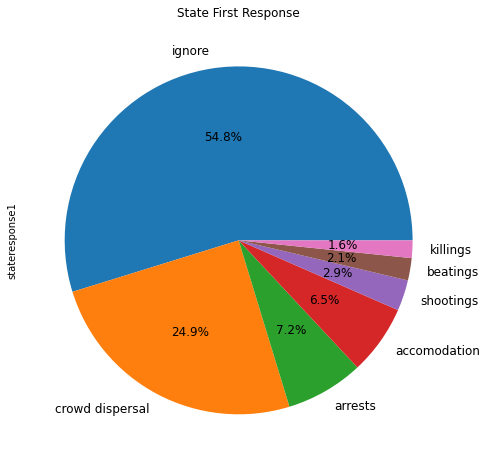

In [61]:
first_response.plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('State First Response')
plt.show()

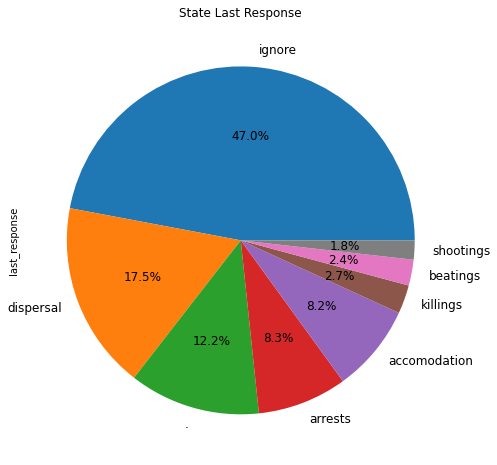

In [62]:
mm_data['last_response'].value_counts().plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%')
plt.title('State Last Response')
plt.show()


In [63]:
#profile = ProfileReport(mm_data)
#profile.to_widgets()
#prof.to_file(output_file='output.html')

In [64]:
corrMatrix = mm_data.corr()

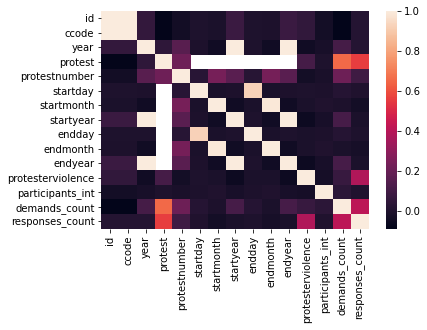

In [65]:
sns.heatmap(corrMatrix, annot= False)
plt.show()